In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import os

In [15]:
# Experiment 3 groups and labels
groups = {"LDA": 0, "QDA": 1, "Trees": 2}
labels = ["LDA", "QDA", "Trees"]
dir = "experiment3/finalgraphs"

MAE_matrix = np.zeros((3,3))
MAE_stdev = np.zeros((3,3))
CI_matrix = np.zeros((3,3))
CI_stdev = np.zeros((3,3))
CI_sizes = np.zeros((3,3))
CI_sizes_stdev = np.zeros((3,3))

MAE_matrix_augment = np.zeros((3,3))
MAE_stdev_augment = np.zeros((3,3))
CI_matrix_augment = np.zeros((3,3))
CI_stdev_augment = np.zeros((3,3))
CI_sizes_augment = np.zeros((3,3))
CI_sizes_stdev_augment = np.zeros((3,3))

def put_info_in_matrices(augment):
    if augment == True:
        augment_string = "augment"
    else: 
        augment_string = "no_augment"
    
    file_dir = f"experiment3/trained{trained_on}/eval{eval_on}/aggregate_{augment_string}/data_summary_trained{trained_on}_eval{eval_on}.txt"
    with open(file_dir, 'r') as file:
        lines = file.readlines()
        
    print(trained_on + eval_on + lines[1])
    
    MAE_info = lines[1]
    percent_CI_info = lines[3]
    
    x = MAE_info.split(" ")[3].removeprefix("avg:").removesuffix(",")
    MAE = float(x)
    
    stdev = MAE_info.split(" ")[4].removeprefix("stdev:").removesuffix(",")
    stdev = float(stdev)
    
    if augment:
        MAE_matrix_augment[groups[trained_on]][groups[eval_on]] = MAE
        MAE_stdev_augment[groups[trained_on]][groups[eval_on]] = stdev
    else:
        MAE_matrix[groups[trained_on]][groups[eval_on]] = MAE
        MAE_stdev[groups[trained_on]][groups[eval_on]] = stdev
    
    percent_in_CI = eval(lines[2])
    percent_in_CI = [i * 100 for i in percent_in_CI]
    avg = np.average(percent_in_CI)
    stdev = np.std(percent_in_CI)
    
    if augment:
        CI_matrix_augment[groups[trained_on]][groups[eval_on]] = avg
        CI_stdev_augment[groups[trained_on]][groups[eval_on]] = stdev
    else:
        CI_matrix[groups[trained_on]][groups[eval_on]] = avg
        CI_stdev[groups[trained_on]][groups[eval_on]] = stdev
    
    sizes = eval(lines[4])
    avg = np.average(sizes)
    stdev = np.std(sizes)
    
    if augment:
        CI_sizes_augment[groups[trained_on]][groups[eval_on]] = avg
        CI_sizes_stdev_augment[groups[trained_on]][groups[eval_on]] = stdev
    else:
        CI_sizes[groups[trained_on]][groups[eval_on]] = avg
        CI_sizes_stdev[groups[trained_on]][groups[eval_on]] = stdev

for trained_on in groups.keys():
    for eval_on in groups.keys(): 
        put_info_in_matrices(True)
        put_info_in_matrices(False)

print(MAE_matrix)

pass

LDALDAMean absolute errors. avg:0.05448337128148728, stdev:0.07481319161033399

LDALDAMean absolute errors. avg:0.10093342893754785, stdev:0.10057741898067607

LDAQDAMean absolute errors. avg:0.15230903624118272, stdev:0.16273191632952128

LDAQDAMean absolute errors. avg:0.1875534009628688, stdev:0.16255695874248094

LDATreesMean absolute errors. avg:0.05162040794558639, stdev:0.07137114696759325
LDATreesMean absolute errors. avg:0.1037631189095942, stdev:0.09065994117132604

QDALDAMean absolute errors. avg:0.11731373175893878, stdev:0.13038431812886536

QDALDAMean absolute errors. avg:0.15981696997588563, stdev:0.13902308179711395
QDAQDAMean absolute errors. avg:0.12704344978631374, stdev:0.1255259337706355

QDAQDAMean absolute errors. avg:0.17904119175925748, stdev:0.14719378127576863

QDATreesMean absolute errors. avg:0.09783523659969794, stdev:0.10303650594904072
QDATreesMean absolute errors. avg:0.17945098181829763, stdev:0.15823234290746863

TreesLDAMean absolute errors. avg:0.06

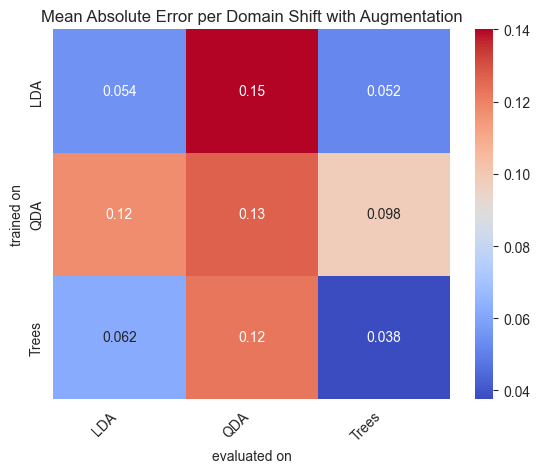

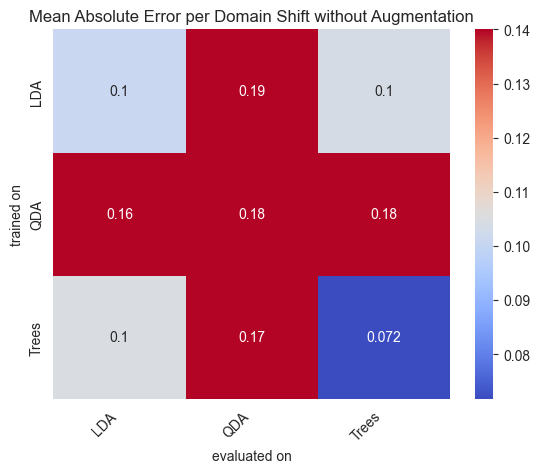

In [16]:
plot = sns.heatmap(MAE_matrix_augment, 
            cmap="coolwarm",
            annot=True,
            vmax=0.14,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Mean Absolute Error per Domain Shift with Augmentation"
plot.set_title(name)
os.makedirs(dir, exist_ok=True)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

plot = sns.heatmap(MAE_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax=0.14,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Mean Absolute Error per Domain Shift without Augmentation"
plot.set_title(name)
os.makedirs(dir, exist_ok=True)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

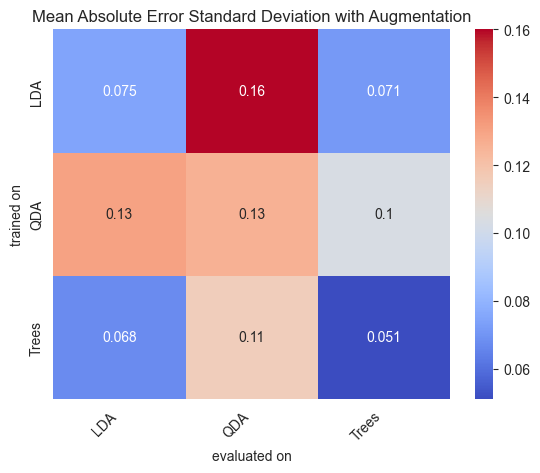

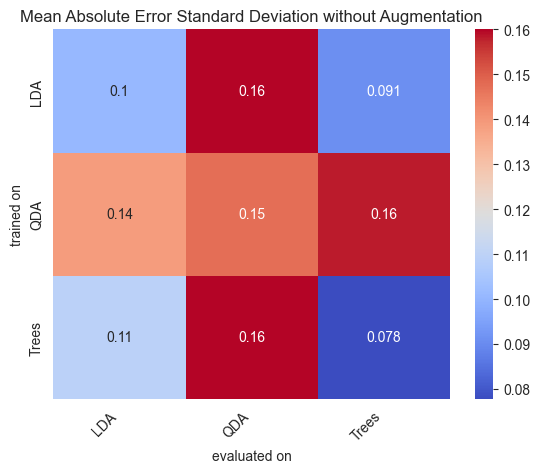

In [17]:
plot = sns.heatmap(MAE_stdev_augment, 
            cmap="coolwarm",
            annot=True,
            vmax= 0.16,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Mean Absolute Error Standard Deviation with Augmentation"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

plot = sns.heatmap(MAE_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax= 0.16,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Mean Absolute Error Standard Deviation without Augmentation"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_14140\4046745309.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


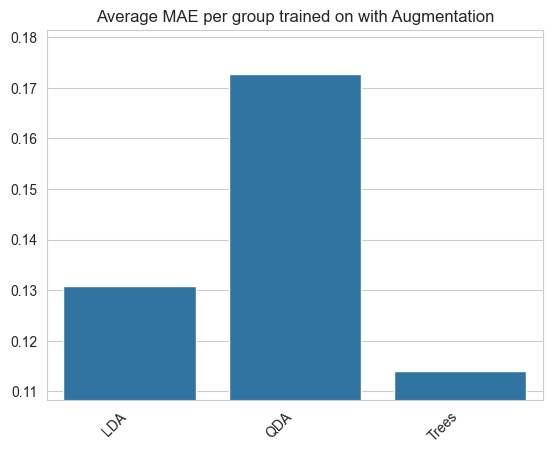

C:\Users\maxso\AppData\Local\Temp\ipykernel_14140\4046745309.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


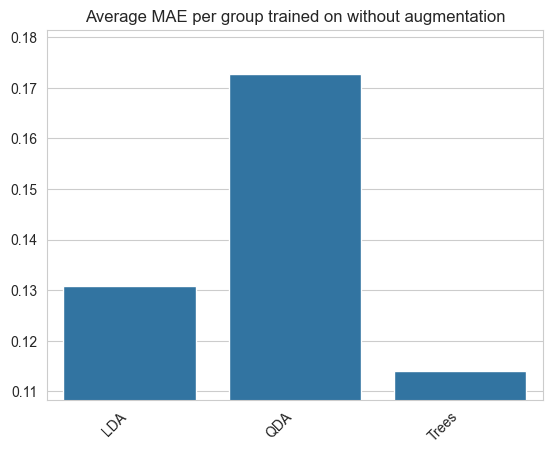

In [18]:
error_per_trained = np.average(MAE_matrix, axis=1)
high = max(error_per_trained) * 1.05
low = min(error_per_trained) * 0.95
plot = sns.barplot(x=labels, y=error_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group trained on with Augmentation"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

error_per_trained = np.average(MAE_matrix, axis=1)
high = max(error_per_trained) * 1.05
low = min(error_per_trained) * 0.95
plot = sns.barplot(x=labels, y=error_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group trained on without augmentation"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_14140\2552758926.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


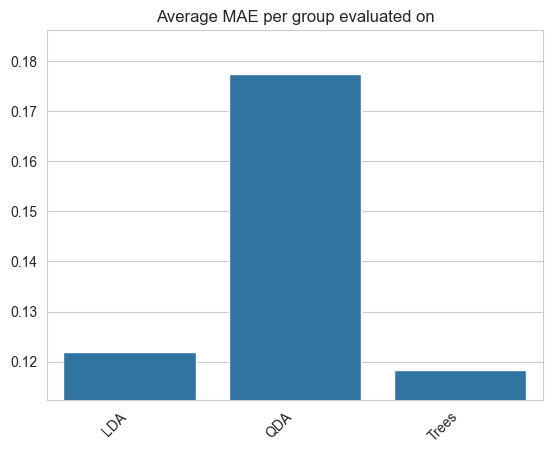

In [19]:
error_per_evaluated = np.average(MAE_matrix, axis=0)
high = max(error_per_evaluated) * 1.05
low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group evaluated on"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

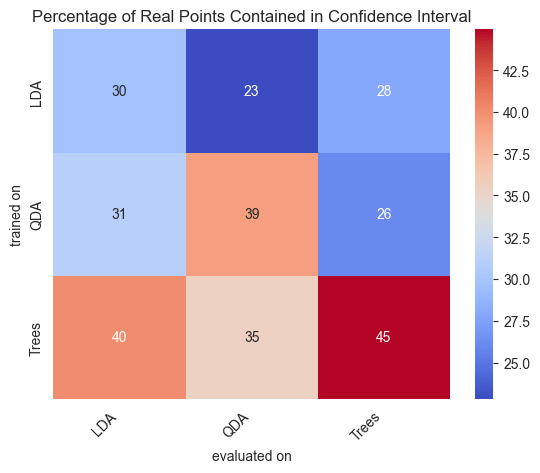

In [20]:
plot = sns.heatmap(CI_matrix, 
            cmap="coolwarm",
            annot=True,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Percentage of Real Points Contained in Confidence Interval"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

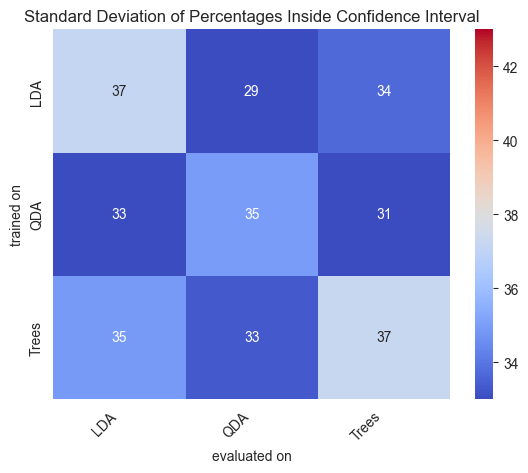

In [21]:
plot = sns.heatmap(CI_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax=43,
            vmin=33,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Standard Deviation of Percentages Inside Confidence Interval"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

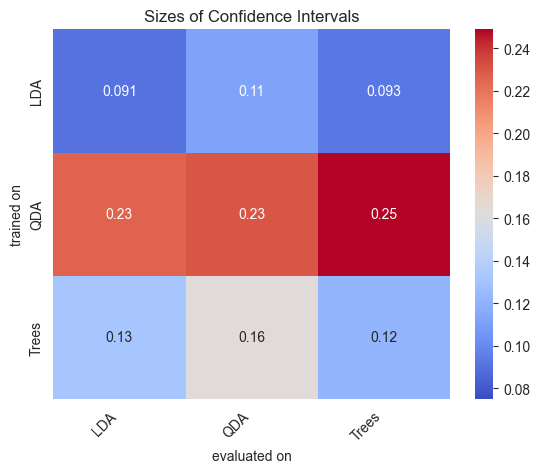

In [22]:
plot = sns.heatmap(CI_sizes, 
            cmap="coolwarm",
            annot=True,
            vmin=0.075,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Sizes of Confidence Intervals"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

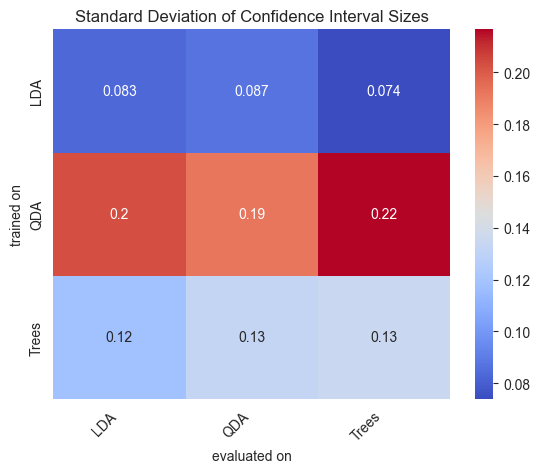

In [23]:
plot = sns.heatmap(CI_sizes_stdev, 
            cmap="coolwarm",
            annot=True,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Standard Deviation of Confidence Interval Sizes"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_14140\540695433.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


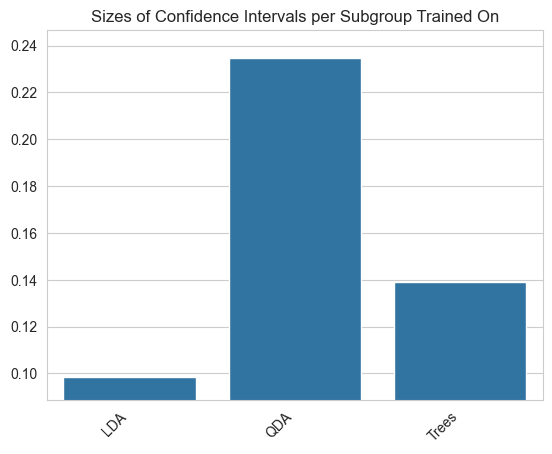

In [24]:
size_per_trained = np.average(CI_sizes, axis=1)
high = max(size_per_trained) * 1.05
low = min(size_per_trained) * 0.9
plot = sns.barplot(x=labels, y=size_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Sizes of Confidence Intervals per Subgroup Trained On"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

[[ 0.          0.08661997  0.00282969]
 [-0.01922422  0.          0.00040979]
 [ 0.0332155   0.09391879  0.        ]]


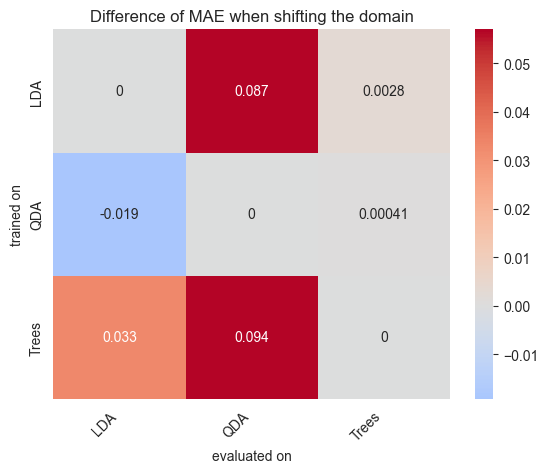

In [25]:
diff_matrix = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        diff_matrix[i][j] = MAE_matrix[i][j] - MAE_matrix[i][i]
print(diff_matrix)
# labels = labels[0:7]
plot = sns.heatmap(diff_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax= 0.057,
            center=0.0,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Difference of MAE when shifting the domain"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

['LDA', 'QDA', 'Trees']


C:\Users\maxso\AppData\Local\Temp\ipykernel_14140\1496828612.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


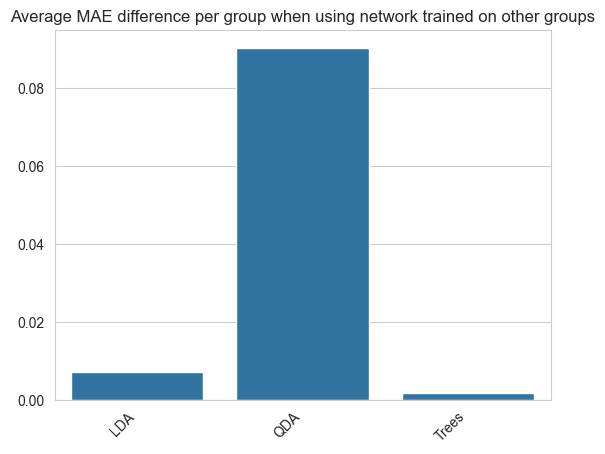

In [26]:
error_per_evaluated = np.sum(diff_matrix, axis=0)/2 #Done because np.avg takes shift from itself to itself into account, which we dont want.
# high = max(error_per_evaluated) * 1.05
# low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
print(labels)
# plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when using network trained on other groups"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_14140\3550454815.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


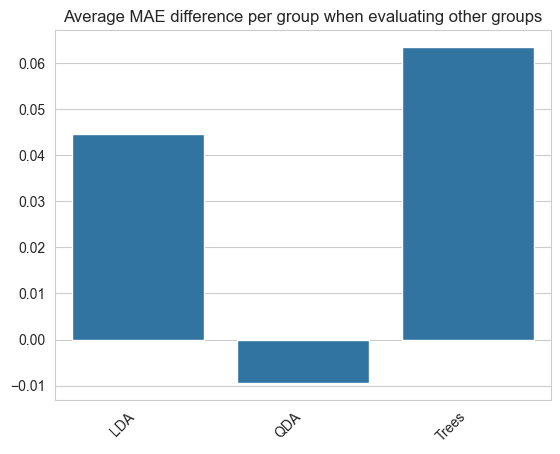

In [27]:
error_per_trained = np.sum(diff_matrix, axis=1)/2
plot = sns.barplot(x=labels, y=error_per_trained)
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when evaluating other groups"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()